In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', parser='auto')
mnist


{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [2]:
type(mnist)

sklearn.utils._bunch.Bunch

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnist.data.max()

pixel1       0
pixel2       0
pixel3       0
pixel4       0
pixel5       0
            ..
pixel780    62
pixel781     0
pixel782     0
pixel783     0
pixel784     0
Length: 784, dtype: int64

In [5]:
print(mnist.data.values.max())
print(mnist.data.values.min())

255
0


In [6]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

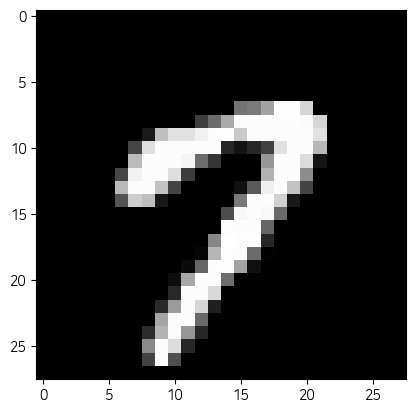

In [7]:
import matplotlib.pyplot as plt

plt.imshow(mnist.data.values[15].reshape(28, 28), cmap='gray')

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1)
y_train.value_counts()

class
1    7088
7    6544
3    6395
2    6322
9    6244
6    6200
0    6194
4    6191
8    6134
5    5688
Name: count, dtype: int64

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9692857142857143

['0']


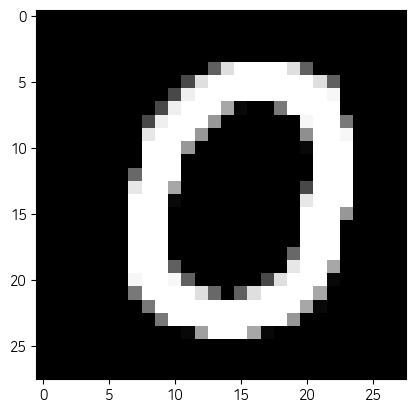

['5']


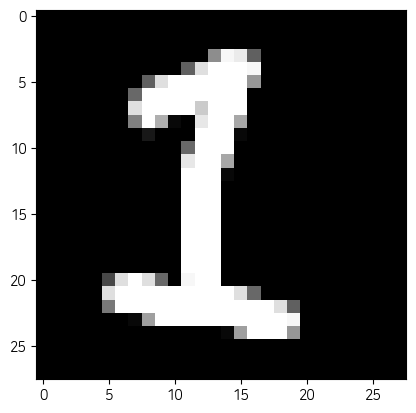

['2']


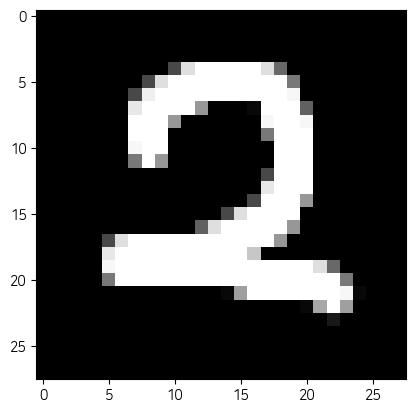

['3']


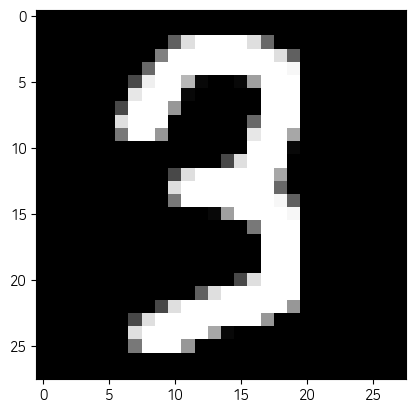

['9']


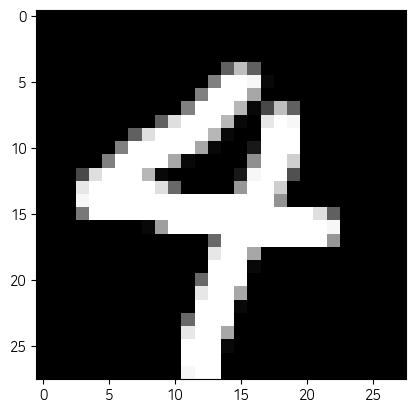

['5']


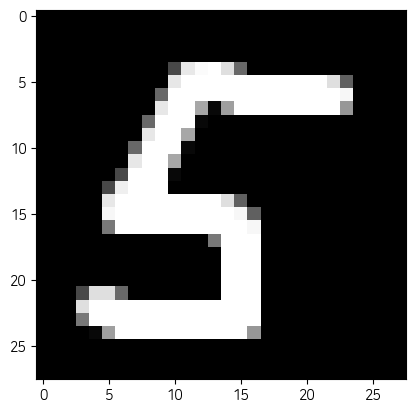

['5']


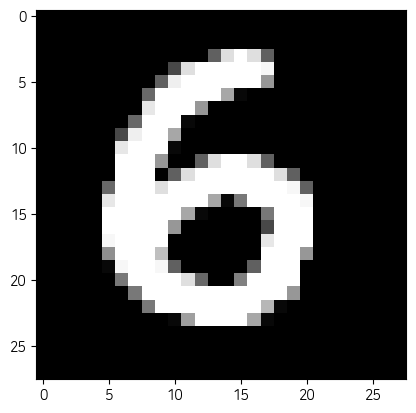

['7']


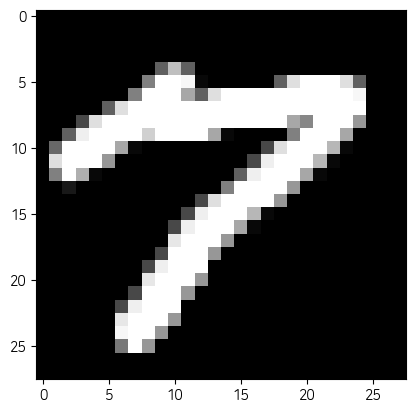

['3']


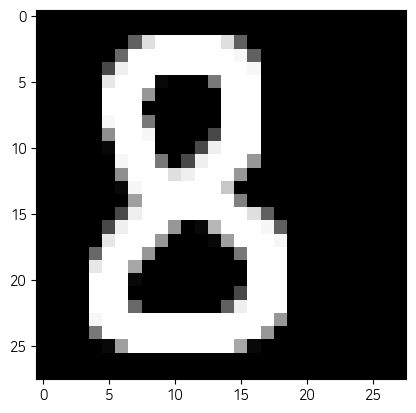

['3']


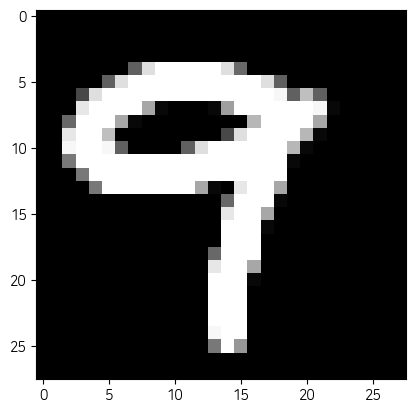

In [28]:
import glob
from PIL import Image
import numpy as np
import warnings
warnings.filterwarnings('ignore')

for path in glob.glob('손글씨/*png'):
    img = Image.open(path).convert('L') # convert('L')은 이미지를 grayscale로 읽음
    data = np.resize(img, (28, 28))
    data = 255 - data
    plt.imshow(data, cmap='gray')
    data = np.resize(data,(1, 784))
    pred = clf.predict(data)
    print(pred)
    plt.show()
    